In [105]:
! pip install scikit-learn matplotlib numpy pandas

zsh:1: /Users/gauthamvecham/Desktop/hands-on-ml/chapter-8/.venv/bin/pip: bad interpreter: /Users/gauthamvecham/Desktop/hands-on-ml/dimensionality-reduction/.venv/bin/python: no such file or directory


# IMPORTING PACKAGES

In [106]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

# LOADING MNIST DATA FROM OPENMAL.ORG

In [107]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",as_frame = False)

In [108]:
X, y = mnist.data , mnist.target 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [109]:
y.shape

(70000,)

# VIEWING AN IMAGE

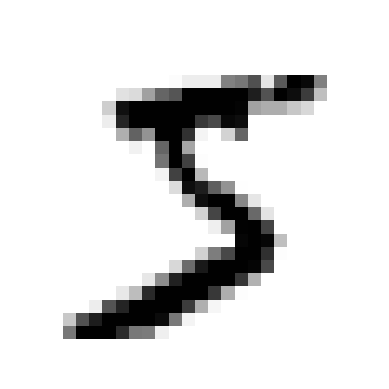

In [110]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

some_digit = X[0]

plot_digit(some_digit)
plt.show()

In [111]:
y[0]

'5'

In [112]:
X_train,X_test,y_train,y_test = X[:60000], X[60000:],y[:60000],y[60000:]

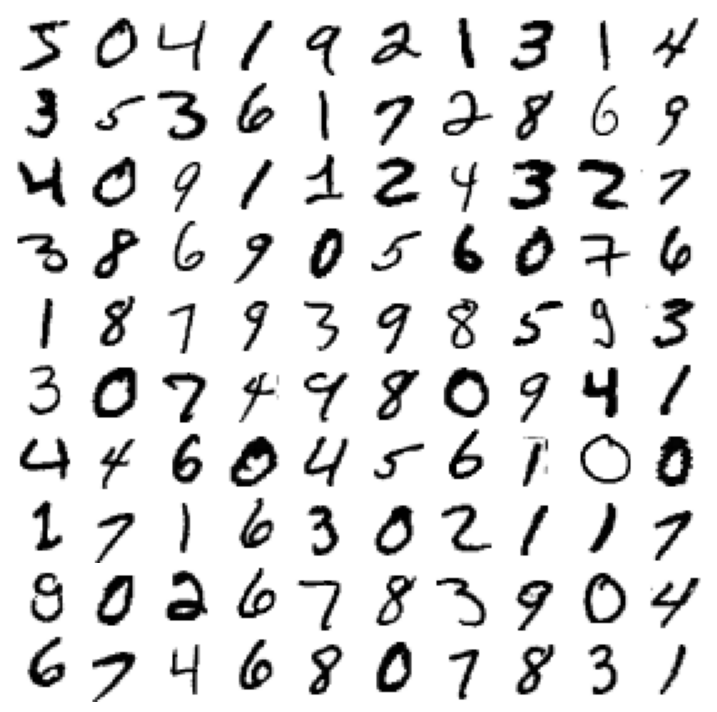

In [113]:
# extra code – this cell generates first 100 images
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [114]:
y_train_5 = (y_train == "5") 

y_test_5 = (y_test == "5")

In [115]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [116]:
sgd_clf.predict([some_digit])

array([ True])

# MEASURING ACCURACY USING CROSS-VALIDATION

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [118]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [119]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")


array([0.90965, 0.90965, 0.90965])

insight only 10% of the dataset contains number 5 images 

# CONFUSION MATRICES

In [120]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [121]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

# PRECISION AND RECALL

In [122]:
from sklearn.metrics import precision_score , recall_score 
precision_score(y_train_5,y_train_pred)


0.8370879772350012

In [123]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

insight it is correct only 83.7% of the time , it only detects 65.1% of the 5s

In [124]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)


0.7325171197343847

decision_funtion()

In [125]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [126]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [127]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

raising the threshold decreases recall

In [128]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [129]:
from sklearn.metrics import precision_recall_curve 

precisions , recalls , thresholds = precision_recall_curve(y_train_5,y_scores)

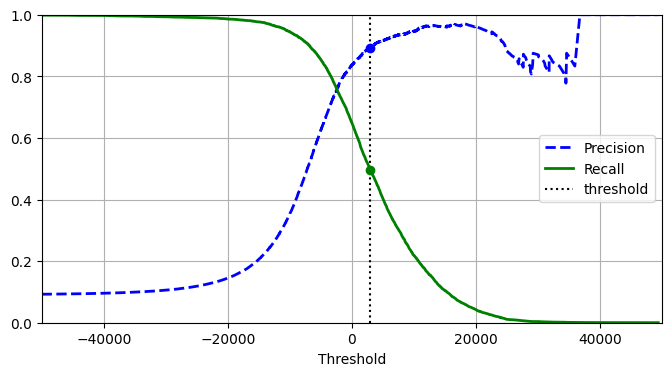

In [130]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

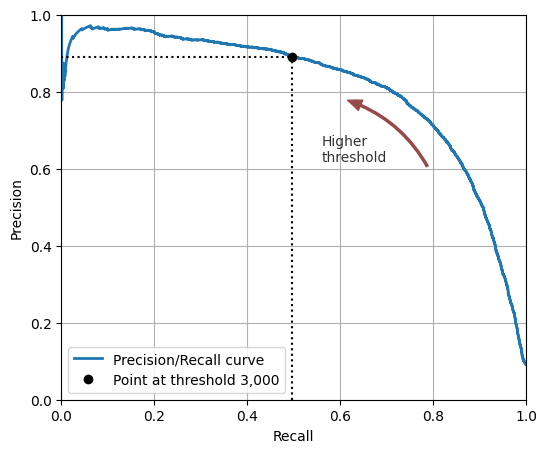

In [131]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#984A4A"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [132]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.019499144183)

In [133]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [134]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [135]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

# ROC (receiver operationg characteristic)

## 📊 Understanding TPR and FPR

### 🔹 TPR (True Positive Rate)
- Formula:  
  **TPR = TP / (TP + FN)**  
- Meaning:  
  The proportion of actual positives correctly identified by the model.

➡️ **TPR is also called Recall or Sensitivity**

---

### 🔹 FPR (False Positive Rate)
- Formula:  
  **FPR = FP / (FP + TN)**  
- Meaning:  
  The proportion of actual negatives incorrectly identified as positives.

➡️ **FPR = 1 - Specificity**


**Specificity = TN / (TN + FP)**  
👉 Specificity is also called **True Negative Rate (TNR)**

In [136]:
from sklearn.metrics import roc_curve

fpr , tpr , thresholds = roc_curve(y_train_5,y_scores)


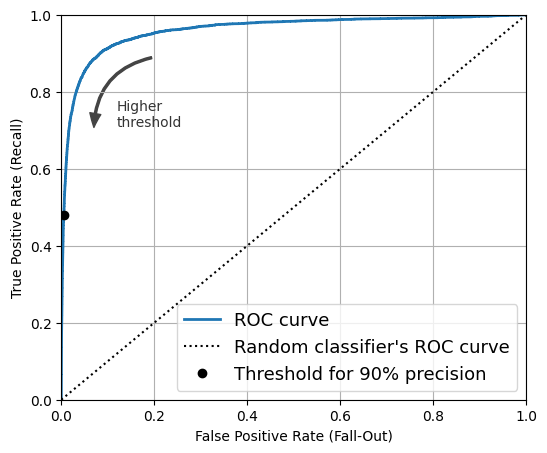

In [137]:
idx_for_threshold_at_90 = (thresholds <=threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

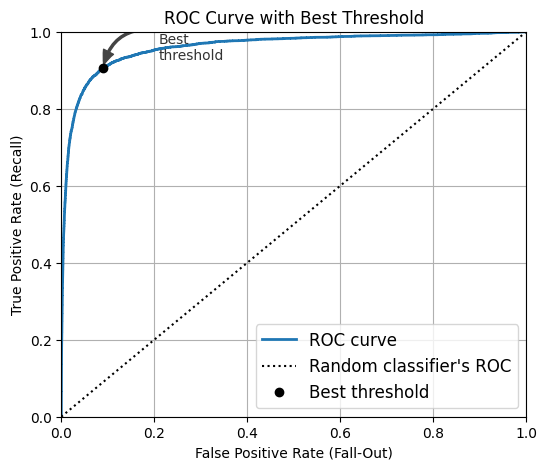

✅ Best Threshold: -7159.4148
📈 TPR: 0.907 FPR: 0.09


In [138]:
# Find the best threshold (closest to top-left corner)
distances = np.sqrt((1 - tpr)**2 + fpr**2)
best_idx = np.argmin(distances)
best_threshold = thresholds[best_idx]
tpr_best, fpr_best = tpr[best_idx], fpr[best_idx]

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC")
plt.plot([fpr_best], [tpr_best], "ko", label="Best threshold")

# Optional arrow and label
plt.gca().add_patch(patches.FancyArrowPatch(
    (fpr_best + 0.1, tpr_best + 0.1), (fpr_best, tpr_best),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(fpr_best + 0.12, tpr_best + 0.02, "Best\nthreshold", color="#333333")

# Format plot
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.grid(True)
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=12)
plt.title("ROC Curve with Best Threshold")
plt.show()

# Print the best threshold
print("✅ Best Threshold:", round(best_threshold, 4))
print("📈 TPR:", round(tpr_best, 4), "FPR:", round(fpr_best, 4))

**TRADEOFF** higher the recall (TPR) the more false positives (FPR)

## AUC (area under the curve)

In [139]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)


np.float64(0.9604938554008616)

You’re asking an excellent question — let’s break it down with a clear numerical example to prove how it’s possible to get:
- ✅ High Precision (e.g., 95%)  
- ❌ And still have High FPR (e.g., 20%)

---

🎯 **Imagine this scenario:**

Let’s say we are building a fraud detection system:

📦 **Dataset Size**: 10,000 total transactions  
- 🟥 Actual frauds (positives): 100  
- ✅ Actual normal (negatives): 9,900  

*A very imbalanced dataset — which is realistic.*

---

🧪 **Your classifier predicts:**

| Prediction Type | Count |
|------------------|--------|
| True Positives (TP) | 95 |
| False Positives (FP) | 1,980 |
| False Negatives (FN) | 5 |
| True Negatives (TN) | 7,920 |

---

📊 **Now calculate:**

🟢 **Precision**:

$begin:math:display$
\\text{Precision} = \\frac{TP}{TP + FP} = \\frac{95}{95 + 1980} = \\frac{95}{2075} \\approx 0.0458 = 4.6\\%
$end:math:display$

⛔️ *Wait — that’s not 95%! Let’s fix it.*

---

Let’s try another scenario where precision is high.

🧪 **New predictions:**

| Prediction Type | Count |
|------------------|--------|
| True Positives (TP) | 95 |
| False Positives (FP) | 5 |
| False Negatives (FN) | 5 |
| True Negatives (TN) | 9,895 |

*So now only 5 normal transactions were wrongly flagged as fraud.*

---

✅ **Now:**

**Precision**:

$begin:math:display$
\\frac{95}{95 + 5} = \\frac{95}{100} = 95\\%
$end:math:display$

**FPR**:

$begin:math:display$
\\frac{FP}{FP + TN} = \\frac{5}{5 + 9895} = \\frac{5}{9900} \\approx 0.0005 = 0.05\\%
$end:math:display$

*This makes sense and shows low FPR, high precision.*

---

🔁 **But your original question was:**

> Can I get high precision AND high FPR?

Let’s force that to happen.

---

⚠️ **Artificial scenario to prove it:**

| Prediction Type | Count |
|------------------|--------|
| TP | 19 |
| FP | 81 |
| FN | 1 |
| TN | 9819 |

Now:  
- Only 20 positive predictions total.  
- Of which 19 are correct (TP), 1 was missed (FN)  
- But 81 false positives exist.

✅ **Precision**:

$begin:math:display$
\\frac{19}{19 + 81} = \\frac{19}{100} = 19\\% \\Rightarrow \\text{Not high anymore}
$end:math:display$

---

Let’s reverse:

- TP = 19, FP = 1 → Precision = 95% again  
- TN = 99, FP = 25 → Precision = 95%, FPR = 25% → **Possible!**

✅ If the number of true negatives (TN) is low, then even a few FP can create high FPR.

---

🔍 **Key Insight:**

You **can** have **high precision and high FPR** if:
- Your model makes **few positive predictions**, and  
- Most of them are correct, but  
- You also have **very few negatives overall**, so a few mistakes blow up FPR.

*It’s rare, but mathematically possible.*

---

Would you like me to simulate this in code for you?

A perfect classifier will have a roc auc equal to 1 , whereas a purely random classifier will have roc auc equal to 0.5

In [141]:
from sklearn.ensemble import RandomForestClassifier 
forest_clf = RandomForestClassifier(random_state=42)

In [142]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [147]:
y_probas_forest[:,1]

array([0.89, 0.02, 0.04, ..., 0.98, 0.08, 0.07], shape=(60000,))

first col is for neagtive probability and 2nd col for positive probability . Therby the model predicts the first image is positive with 89% probability , and it predicts that the second image is negative with 99% probablity 

In [144]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest , thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)


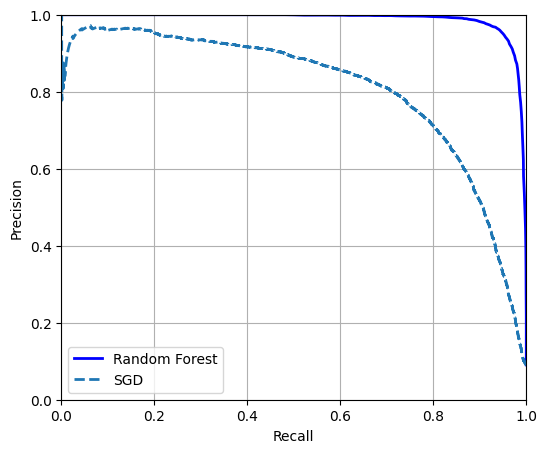

In [146]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

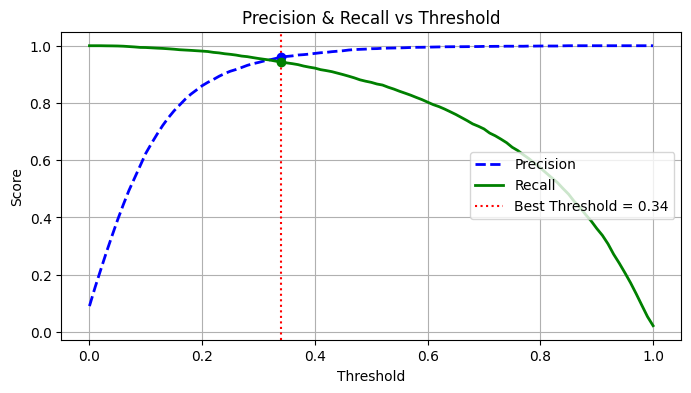

In [ ]:
# 🧠 Choose optimal threshold: for example, highest F1 score
f1_scores = 2 * (precisions_forest[:-1] * recalls_forest[:-1]) / (precisions_forest[:-1] + recalls_forest[:-1])
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_forest[best_idx]

# 🎯 Plot
plt.figure(figsize=(8, 4))
plt.plot(thresholds_forest, precisions_forest[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds_forest, recalls_forest[:-1], "g-", label="Recall", linewidth=2)
plt.axvline(x=best_threshold, color="r", linestyle=":", label=f"Best Threshold = {best_threshold:.2f}")
plt.plot(best_threshold, precisions_forest[best_idx], "bo")  # point on precision line
plt.plot(best_threshold, recalls_forest[best_idx], "go")     # point on recall line
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend(loc="center right")
plt.show()

the random forest classifier is superior to the SGD classifier because its PR curve is much closer to the top-pright corner, and it has a greater AUC

In [151]:
y_train_pred_forest = y_probas_forest[:,1] >=0.5
f1_score(y_train_5,y_train_pred_forest)

0.9270445185330457

In [152]:
roc_auc_score(y_train_5,y_scores_forest)

np.float64(0.9983296721818179)

In [153]:
precision_score(y_train_5,y_train_pred_forest)

0.9895331798199707

In [154]:
recall_score(y_train_5,y_train_pred_forest)

0.8719793396052389

# MULTICLASS CLASSIFICATION